In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/ake/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
build = pd.read_csv("csv_building_structure.csv")
name = pd.read_csv("ward_vdcmun_district_name_mapping.csv")

In [11]:
building = build.merge(name, how='inner', on=['ward_id', 'vdcmun_id', 'district_id'])

In [12]:
building


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,vdcmun_name,district_name
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Siddhicharan Municipality,Okhaldhunga
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Siddhicharan Municipality,Okhaldhunga
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Siddhicharan Municipality,Okhaldhunga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,...,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762102,366709001251,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762103,366709001261,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762104,366709001271,36,3603,360302,2,0,19,306,18,0,...,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha


In [13]:
building.shape

(762106, 33)

In [14]:
building.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [15]:
builds = building.dropna()

In [16]:
builds.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [17]:
builds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762094 non-null  int64 
 1   district_id                             762094 non-null  int64 
 2   vdcmun_id                               762094 non-null  int64 
 3   ward_id                                 762094 non-null  int64 
 4   count_floors_pre_eq                     762094 non-null  int64 
 5   count_floors_post_eq                    762094 non-null  int64 
 6   age_building                            762094 non-null  int64 
 7   plinth_area_sq_ft                       762094 non-null  int64 
 8   height_ft_pre_eq                        762094 non-null  int64 
 9   height_ft_post_eq                       762094 non-null  int64 
 10  land_surface_condition                  762094 non-null  obje

In [18]:
builds.shape

(762094, 33)

In [19]:
builds["damage_grade"].value_counts()

damage_grade
Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: count, dtype: int64

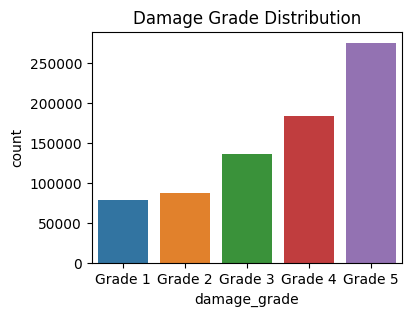

In [20]:
import seaborn as sns
plt.figure(figsize = (4, 3))
sns.countplot(x="damage_grade", data=builds, order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"])
plt.title("Damage Grade Distribution")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split 
y = builds["damage_grade"]
x = builds.drop(columns = ["damage_grade","condition_post_eq",
                           "count_floors_post_eq","height_ft_post_eq",
                           "condition_post_eq", "technical_solution_proposed"])
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = .3, 
    random_state = 48, 
    stratify = y)

In [22]:
print("Train Values: {}".format(x_train.shape))
print("Train Labels: {}".format(y_train.shape))
print("Test Values: {}".format(x_test.shape))
print("Test Values: {}".format(y_test.shape))

Train Values: (533465, 28)
Train Labels: (533465,)
Test Values: (228629, 28)
Test Values: (228629,)


In [23]:
dropID_X_train = x_train.drop(columns=['building_id'])
dropID_X_test = x_test.drop(columns=['building_id'])
dropID_y_train = y_train.drop(columns=["building_id"])
dropID_y_test = y_test.drop(columns=["building_id"])

In [24]:
print("Train Values: {}".format(dropID_X_train.shape))
print("Train Labels: {}".format(dropID_y_train.shape))
print("Test Values: {}".format(dropID_X_test.shape))
print("Test Values: {}".format(dropID_y_test.shape))

Train Values: (533465, 27)
Train Labels: (533465,)
Test Values: (228629, 27)
Test Values: (228629,)


In [25]:
dropID_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533465 entries, 387900 to 216571
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             533465 non-null  int64 
 1   vdcmun_id                               533465 non-null  int64 
 2   ward_id                                 533465 non-null  int64 
 3   count_floors_pre_eq                     533465 non-null  int64 
 4   age_building                            533465 non-null  int64 
 5   plinth_area_sq_ft                       533465 non-null  int64 
 6   height_ft_pre_eq                        533465 non-null  int64 
 7   land_surface_condition                  533465 non-null  object
 8   foundation_type                         533465 non-null  object
 9   roof_type                               533465 non-null  object
 10  ground_floor_type                       533465 non-null 

In [26]:
## 畫圖函數
def plot_feature_importance(importance):
    """
    输入：
    importance - 包含特徵和重要性的數據框

    功能：
    繪制前十大特徵的重要性條形圖
    """
    # 取前十大特徵並按重要性從小到大排序
    top_features = importance.head(10).sort_values(by="Importance", ascending=False)

    # 繪制條形圖
    plt.figure(figsize=(10, 6))
    plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.xticks(rotation=30)
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importances')
    plt.show()

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

num_transformer = Pipeline(
    steps=[("num_imputer", 
            SimpleImputer(
                strategy="median")),
           ("num_scaler", 
            StandardScaler())])
cat_transformer = Pipeline(
    steps=[("cat_imputer", 
            SimpleImputer(
                strategy="most_frequent")),
           ("cat_encoder", 
            OneHotEncoder(
                sparse_output=True))])

from sklearn.compose import ColumnTransformer, make_column_selector
transformer = ColumnTransformer(
    transformers = [
        ("num_transformer",
         num_transformer,
         make_column_selector(
             dtype_include="number")),
        ("cat_transformer",
         cat_transformer,
         make_column_selector(
             dtype_include="category"))])

_ = transformer.fit(dropID_X_train, dropID_y_train)

_3 = transformer.fit(dropID_X_test, dropID_y_test)

##### Logistic

In [21]:
from sklearn.preprocessing import LabelEncoder
# 轉換類別標籤為數字
label_encoder = LabelEncoder()
dropID_y_train_encoded = label_encoder.fit_transform(dropID_y_train)
dropID_y_test_encoded = label_encoder.transform(dropID_y_test)

# 計算類別權重
#class_weights = compute_class_weight('balanced', classes=np.unique(dropID_y_train_encoded), y=dropID_y_train_encoded)
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [22]:
enet_pipeline = Pipeline(
    steps = [
        ("transformer", 
         transformer),
        ("estimator", 
         LogisticRegression(
             penalty = "elasticnet",
             solver = "saga",
             l1_ratio = 0.5,
             max_iter=500))])

logistic = enet_pipeline.fit(dropID_X_train, dropID_y_train_encoded)

/Users/ake/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                                Feature  Importance
0                           district_id    4.764522
1                             vdcmun_id    2.714416
2                               ward_id    2.325879
8                       foundation_type    0.832508
9                             roof_type    0.370557
3                   count_floors_pre_eq    0.305812
7                land_surface_condition    0.293415
16        has_superstructure_stone_flag    0.257748
15  has_superstructure_mud_mortar_stone    0.180459
11                     other_floor_type    0.162233


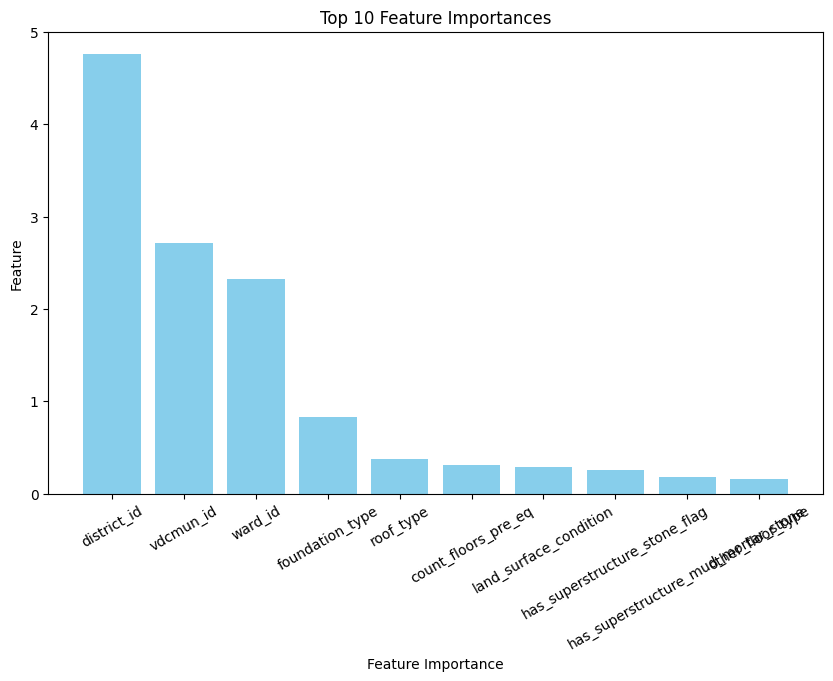

羅吉斯回歸
訓練集Acc:  0.4291134376200875
測試集Acc:  0.4287076442621015
訓練集F1:  0.31665341386449103
測試集F1:  0.31577480081094833


In [23]:
# 獲取訓練好的邏輯回歸模型
lr_model = enet_pipeline.named_steps['estimator']

# 計算特徵重要性
lr_feature_importances = np.abs(lr_model.coef_[0])  # 係數絕對值作為重要性

results = list(zip(dropID_X_train.columns, lr_feature_importances))
importance = pd.DataFrame(results, columns=["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
print(importance[:10])  # 列出前10個重要特徵
plot_feature_importance(importance)

# 評估模型
y_train_pred_1 = enet_pipeline.predict(dropID_X_train)
print("羅吉斯回歸")
print("訓練集Acc: ", accuracy_score(dropID_y_train_encoded, y_train_pred_1))

y_test_pred_1 = enet_pipeline.predict(dropID_X_test)
print("測試集Acc: ", accuracy_score(dropID_y_test_encoded, y_test_pred_1))

print("訓練集F1: ", f1_score(dropID_y_train_encoded, y_train_pred_1, average='weighted'))
print("測試集F1: ", f1_score(dropID_y_test_encoded, y_test_pred_1, average='weighted'))

##### 決策樹

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_estimator = DecisionTreeClassifier(
    random_state=42,
    criterion = "gini",
    max_depth=10)

                   Feature  Importance
2                  ward_id    0.259501
8          foundation_type    0.244049
0              district_id    0.180820
1                vdcmun_id    0.167804
9                roof_type    0.028566
4             age_building    0.027929
7   land_surface_condition    0.025030
11        other_floor_type    0.014622
5        plinth_area_sq_ft    0.011661
13      plan_configuration    0.011238


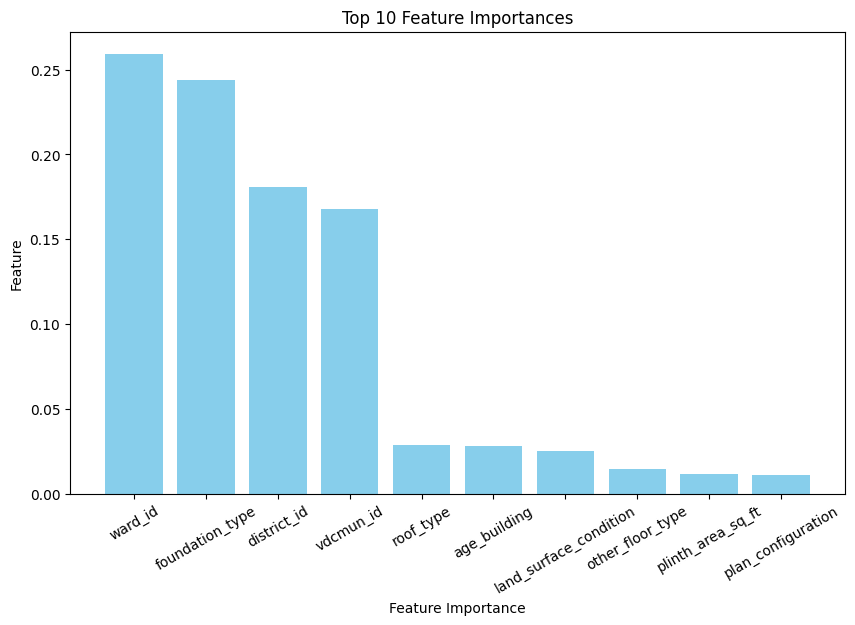

決策樹
訓練集Acc:  0.5239125340931458
測試集Acc:  0.518429420589689
訓練集F1:  0.5016638517457372
測試集F1:  0.49575462638036666


In [27]:
dt_pipeline = Pipeline(steps=[
    ("transformer", transformer),
    ('DTClassifier', dt_estimator)])

dt_pipeline.fit(dropID_X_train, dropID_y_train)
dt_model = dt_pipeline.named_steps['DTClassifier']

feature_importances = dt_model.feature_importances_

results = list(zip(dropID_X_train.columns, feature_importances))
importance2 = pd.DataFrame(results, columns=["Feature", "Importance"])
importance2 = importance2.sort_values(by="Importance", ascending=False)
print(importance2[:10])  # 列出前10個重要特徵
plot_feature_importance(importance2)

y_train_pred_2 = dt_pipeline.predict(dropID_X_train)
print("決策樹")
print("訓練集Acc: ", accuracy_score(dropID_y_train, y_train_pred_2))

y_test_pred_2 = dt_pipeline.predict(dropID_X_test)
print("測試集Acc: ", accuracy_score(dropID_y_test, y_test_pred_2))

print("訓練集F1: ", f1_score(dropID_y_train, y_train_pred_2, average='weighted'))
print("測試集F1: ", f1_score(dropID_y_test, y_test_pred_2, average='weighted'))

##### Xgboost

                                Feature  Importance
8                       foundation_type    0.400572
0                           district_id    0.172679
9                             roof_type    0.078755
1                             vdcmun_id    0.055536
7                land_surface_condition    0.050397
16        has_superstructure_stone_flag    0.037269
11                     other_floor_type    0.037140
12                             position    0.034826
2                               ward_id    0.027404
15  has_superstructure_mud_mortar_stone    0.021155


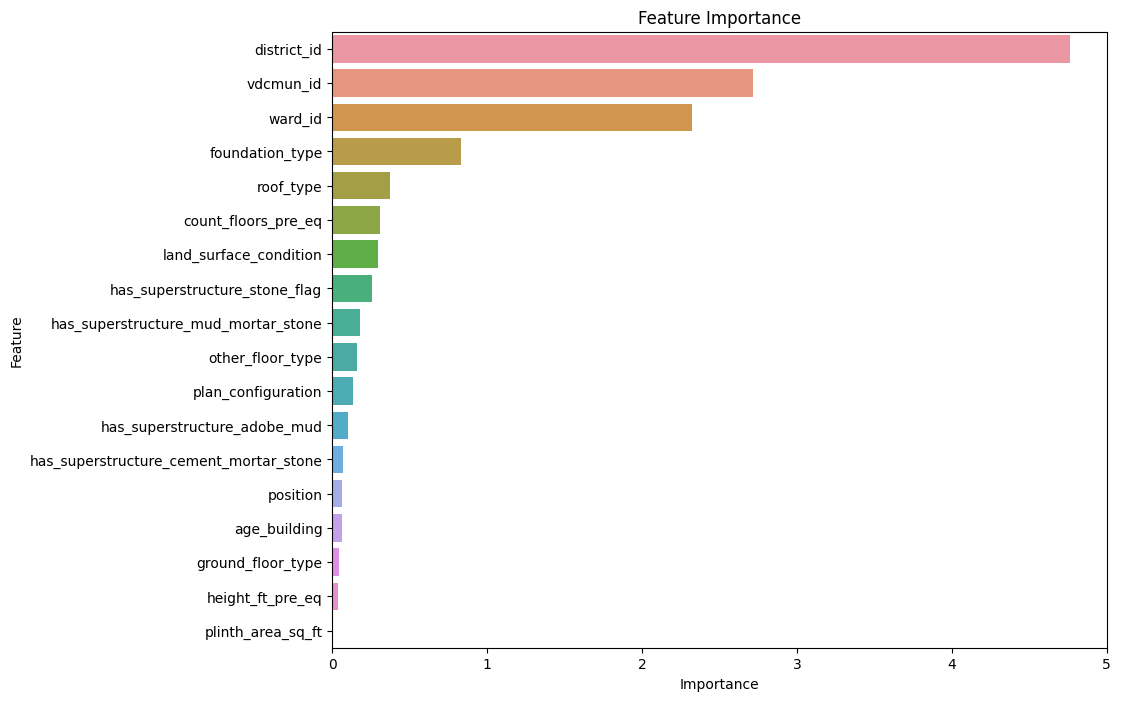

XGBoost (包含二元特徵)
訓練集Acc:  0.5663595549848631
測試集Acc:  0.5529132349789396
訓練集F1:  0.5516905771984983
測試集F1:  0.537336784687617


In [45]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder



# 對目標值進行Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(dropID_y_train)
y_test_encoded = label_encoder.transform(dropID_y_test)

xgb_pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('XGBClassifier', XGBClassifier(objective='multi:softprob', num_class=5, random_state=42))
])

xgb_pipeline.fit(dropID_X_train, y_train_encoded)
xgb_model = xgb_pipeline.named_steps['XGBClassifier']

importances_xgb = xgb_model.feature_importances_
#feature_names = transformer.get_feature_names_out()

results = list(zip(dropID_X_train.columns, importances_xgb))
importance3 = pd.DataFrame(results, columns=["Feature", "Importance"])
importance3 = importance3.sort_values(by="Importance", ascending=False)
print(importance3[:10])
plot_feature_importance(importance3)

y_train_pred_3 = xgb_pipeline.predict(dropID_X_train)
print("XGBoost (包含二元特徵)")
print("訓練集Acc: ", accuracy_score(y_train_encoded, y_train_pred_3))

y_test_pred_3 = xgb_pipeline.predict(dropID_X_test)
print("測試集Acc: ", accuracy_score(y_test_encoded, y_test_pred_3))

print("訓練集F1: ", f1_score(y_train_encoded, y_train_pred_3, average='weighted'))
print("測試集F1: ", f1_score(y_test_encoded, y_test_pred_3, average='weighted'))

##### 隨機森林

In [46]:
rf_pipeline = Pipeline(steps=[('transformer', transformer),
    ('RFClassifier', RandomForestClassifier(random_state=42, max_depth=10))
])
_4 = rf_pipeline.fit(dropID_X_train, dropID_y_train)

                                Feature  Importance
2                               ward_id    0.233601
1                             vdcmun_id    0.194249
8                       foundation_type    0.180150
0                           district_id    0.137293
12                             position    0.056585
4                          age_building    0.045182
16        has_superstructure_stone_flag    0.021698
3                   count_floors_pre_eq    0.019681
9                             roof_type    0.019637
15  has_superstructure_mud_mortar_stone    0.019614


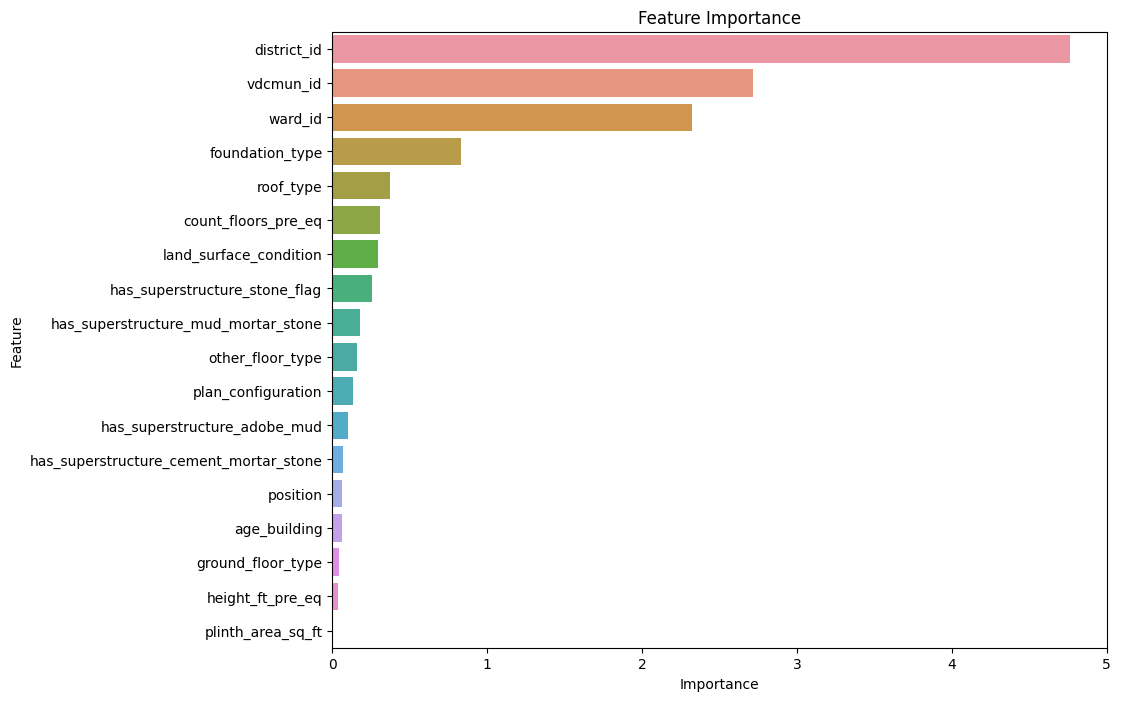

隨機森林 (包含二元特徵)
訓練集Acc:  0.5140412210735474
測試集Acc:  0.5093492076683186
訓練集F1:  0.47191872693096937
測試集F1:  0.4661458016008892


In [47]:
rf_model = rf_pipeline.named_steps['RFClassifier']

importance_rf = rf_model.feature_importances_
#feature_names = transformer.get_feature_names_out()

results = list(zip(dropID_X_train.columns, importance_rf))
importances4 = pd.DataFrame(results, columns=["Feature", "Importance"])
importances4 = importances4.sort_values(by="Importance", ascending=False)
print(importances4[:10])
plot_feature_importance(importances4)

y_train_pred_3 = rf_pipeline.predict(dropID_X_train)
print("隨機森林 (包含二元特徵)")
print("訓練集Acc: ", accuracy_score(y_train, y_train_pred_3))

y_test_pred_3 = rf_pipeline.predict(dropID_X_test)
print("測試集Acc: ", accuracy_score(y_test, y_test_pred_3))

print("訓練集F1: ", f1_score(y_train, y_train_pred_3, average='weighted'))
print("測試集F1: ", f1_score(y_test, y_test_pred_3, average='weighted'))

In [48]:
y_train_pred_4 = rf_pipeline.predict(dropID_X_train)
print("隨機森林")
print("訓練集Acc: ", accuracy_score(dropID_y_train, y_train_pred_4))
print("訓練集F1: ", f1_score(dropID_y_train, y_train_pred_4, average='weighted'))

y_test_pred_4 = rf_pipeline.predict(dropID_X_test)
print("測試集Acc: ", accuracy_score(dropID_y_test, y_test_pred_4))
print("測試集F1: ", f1_score(dropID_y_test, y_test_pred_4, average='weighted'))

隨機森林
訓練集Acc:  0.5140412210735474
訓練集F1:  0.47191872693096937
測試集Acc:  0.5093492076683186
測試集F1:  0.4661458016008892


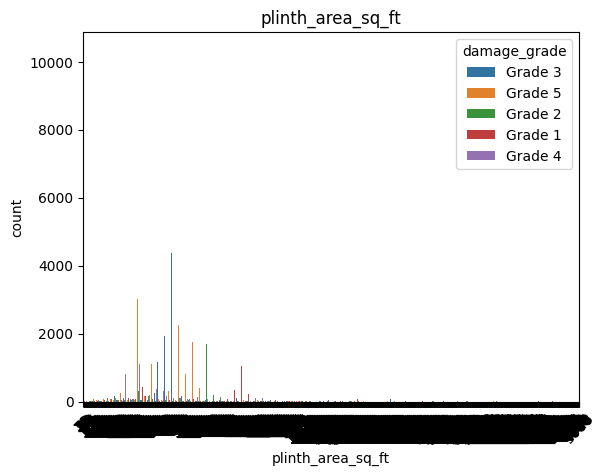

In [63]:
sns.countplot(data=builds, 
              x='plinth_area_sq_ft', hue='damage_grade')
plt.title('plinth_area_sq_ft')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.countplot(data=builds, 
              x='damage_grade', hue='roof_type')
plt.title("damage_grade by roof_type")
plt.xticks(rotation=45)
plt.show()

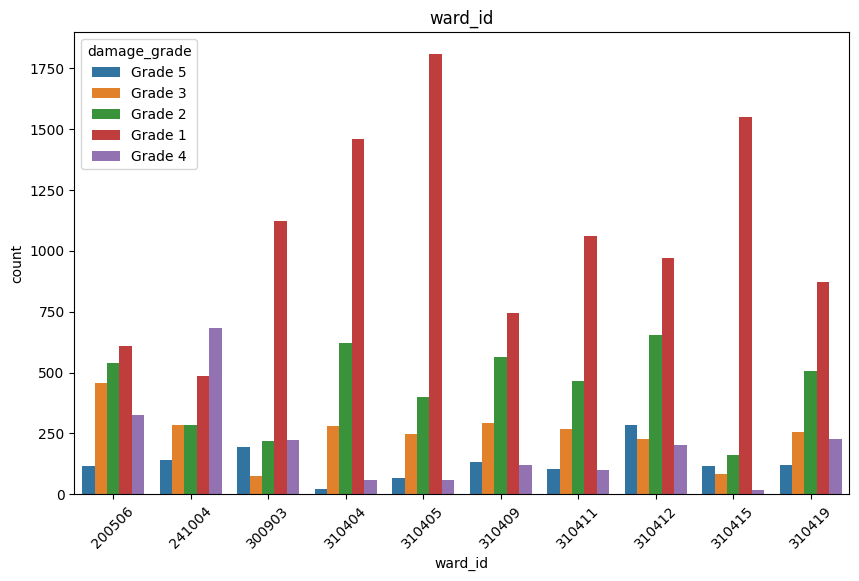

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取前十高频的地区ID
top30_vdcmun_ids = builds['ward_id'].value_counts().nlargest(30).index.tolist()

# 筛选数据集，只保留前十高频地区的数据
builds_top10 = builds[builds['ward_id'].isin(top10_vdcmun_ids)]

# 绘制计数图
plt.figure(figsize=(10, 6))
sns.countplot(data=builds_top10, x='ward_id', hue='damage_grade')
plt.title("ward_id")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取前十高频的地区ID
top10_vdcmun_ids = builds['vdcmun_name'].value_counts().nlargest(10).index.tolist()

# 筛选数据集，只保留前十高频地区的数据
builds_top10 = builds[builds['vdcmun_name'].isin(top10_vdcmun_ids)]

# 绘制计数图
plt.figure(figsize=(6, 5))
sns.countplot(data=builds_top10, x='vdcmun_name', hue='damage_grade')
plt.title("Top 10 vdcmun_name")
plt.xticks(rotation=45)
plt.show()

In [ ]:
top10_vdcmun_ids = builds['ward_id'].value_counts().nlargest(10).index.tolist()

builds_top10 = builds[builds['ward_id'].isin(top10_vdcmun_ids)]


plt.figure(figsize=(10, 6))
sns.countplot(data=builds_top10, x='ward_id', hue='damage_grade')
plt.title("Top 10 ward_id")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 dropID_X_train 是你的特征数据框，dropID_y_train 是损坏等级数据框

# 构建超结构特征的数据框
superstructure = pd.DataFrame({
    'adobe_mud': dropID_X_train["has_superstructure_adobe_mud"] == 1,
    'mud_mortar_stone': dropID_X_train["has_superstructure_mud_mortar_stone"] == 1,
    'stone_flag': dropID_X_train["has_superstructure_stone_flag"] == 1,
    'cement_mortar_stone': dropID_X_train["has_superstructure_cement_mortar_stone"] == 1,
    'mud_mortar_brick': dropID_X_train["has_superstructure_mud_mortar_brick"] == 1,
    'cement_mortar_brick': dropID_X_train["has_superstructure_cement_mortar_brick"] == 1,
    'timber': dropID_X_train["has_superstructure_timber"] == 1,
    'bamboo': dropID_X_train["has_superstructure_bamboo"] == 1,
    'non_engineered': dropID_X_train["has_superstructure_rc_non_engineered"] == 1,
    'engineered': dropID_X_train["has_superstructure_rc_engineered"] == 1,
    'Other': dropID_X_train["has_superstructure_other"] == 1
})

# 将数据框转换为长格式
superstructure_long = superstructure.melt(var_name='superstructure', value_name='Exists')

# 绘制计数图
plt.figure(figsize=(8, 6))
sns.countplot(data=superstructure_long[superstructure_long['Exists']], 
              x='superstructure')
plt.title("Superstructure")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 合并 X_train 和 y_train 成为一个 DataFrame
merged_data = pd.concat([dropID_X_train, dropID_y_train], axis=1)

sns.countplot(data=builds, 
              x='count_floors_pre_eq', hue='damage_grade')
plt.title("count_floors_pre_eq")
plt.xticks(rotation=45)
plt.show()

In [ ]:
top30_age_building = builds['age_building'].value_counts().nlargest(30).index.tolist()

builds_top30 = builds[builds['age_building'].isin(top30_age_building)]


plt.figure(figsize=(10, 6))
sns.countplot(data=builds_top30, x='age_building', hue='damage_grade')
plt.title("Top 30 age_building")
plt.xticks(rotation=45)
plt.show()

In [ ]:
dropID_X_train.info()

In [54]:
from sklearn.metrics import log_loss
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

In [69]:
dropID_X_train_transformed = transformer.fit_transform(dropID_X_train)

# 将模型和预处理器构建成一个流水线
xgb_pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier', XGBClassifier(objective='multi:softprob', num_class=5, random_state=42))
])
xgb_pipeline.fit(dropID_X_train, dropID_y_train_encoded)
log_loss_scorer = 'neg_log_loss'

In [71]:
xgb_pfi_sklearn = permutation_importance(
    xgb_pipeline, 
    dropID_X_test, 
    dropID_y_test, 
    scoring=log_loss_scorer,
    n_repeats=30,
    random_state=48)

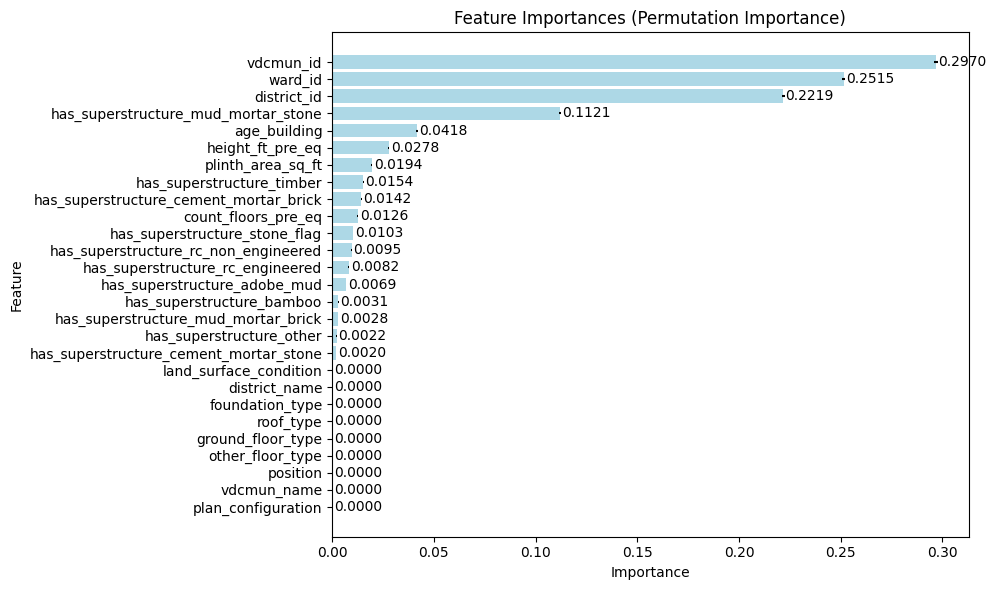

In [97]:
importances = xgb_pfi_sklearn.importances_mean
std = xgb_pfi_sklearn.importances_std
indices = np.argsort(importances)[::-1]

# 特征名称
feature_names = dropID_X_test.columns

# 绘制特征重要性图（水平）
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
bars = plt.barh(range(dropID_X_test.shape[1]), importances[indices], color="lightblue", xerr=std[indices], align="center")
plt.yticks(range(dropID_X_test.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在顶部
plt.xlabel("Importance")
plt.ylabel("Feature")

# 添加特征重要性值的文本标签
for bar, importance in zip(bars, importances[indices]):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', va='center')

plt.tight_layout()
plt.show()

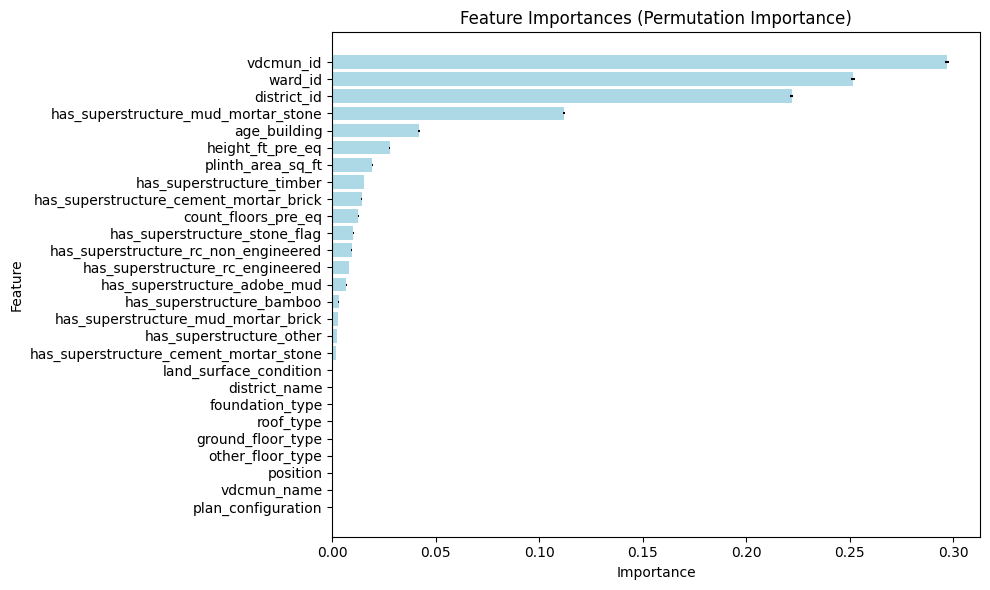

In [93]:
importances = xgb_pfi_sklearn.importances_mean
std = xgb_pfi_sklearn.importances_std
indices = np.argsort(importances)[::-1]

# 特征名称
feature_names = dropID_X_test.columns

# 绘制特征重要性图（水平）
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.barh(range(dropID_X_test.shape[1]), importances[indices], color="#add8e6", xerr=std[indices], align="center")
plt.yticks(range(dropID_X_test.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在顶部
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = [vdcmun_id, ward_id, district_id]

targets_to_plot = damage_grade_df["damage_grade"] 

fig, axs = plt.subplots(len(targets_to_plot), 1, figsize=(12, 8 * len(targets_to_plot)))

for i, target in enumerate(targets_to_plot):
    _ = PartialDependenceDisplay.from_estimator(
        xgb_pipeline.named_steps['classifier'], 
        dropID_X_test_transformed,
        features=features_to_plot,
        target=target,
        n_cols=3,
        ax=axs[i] if len(targets_to_plot) > 1 else axs)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['vdcmun_id', 'ward_id', 'district_id']
targets_to_plot = damage_grade_df["damage_grade"]

fig, axs = plt.subplots(len(targets_to_plot), 1, figsize=(12, 8 * len(targets_to_plot)))

for i, target in enumerate(targets_to_plot):
    _ = PartialDependenceDisplay.from_estimator(
        xgb_pipeline.named_steps['classifier'], 
        dropID_X_test_transformed,
        features=features_to_plot,
        target=target,
        n_cols=3,
        ax=axs[i] if len(targets_to_plot) > 1 else axs)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x15bd5e480> (for post_execute):


ValueError: Image size of 1200x182903200 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1200x182903200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1.82903e+08 with 65034 Axes>

In [81]:
dropID_y_test

501372    Grade 5
157907    Grade 4
268409    Grade 5
387560    Grade 3
9882      Grade 4
           ...   
711234    Grade 3
2252      Grade 1
312465    Grade 5
757063    Grade 4
488046    Grade 3
Name: damage_grade, Length: 228629, dtype: object

In [27]:
damage_grade_df = pd.DataFrame(dropID_y_test)


# 查看DataFrame
print(damage_grade_df)

       damage_grade
501372      Grade 5
157907      Grade 4
268409      Grade 5
387560      Grade 3
9882        Grade 4
...             ...
711234      Grade 3
2252        Grade 1
312465      Grade 5
757063      Grade 4
488046      Grade 3

[228629 rows x 1 columns]
